Training Data

In [1]:
from pyspark.sql.types import IntegerType
from pyspark.sql import SparkSession
from pyspark.sql.functions import split, col
import pandas as pd

data_dir = "../data/proccessed/dump.csv"
spark = SparkSession.builder \
    .appName("recommend-ML") \
    .config("spark.executor.memory", "4g") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()


df = spark.read.csv(data_dir, header=True, inferSchema=True)
cols = df.columns

df = df.withColumn("albumId", col("albumId").cast("integer"))
df = df.withColumn("rating", col("rating").cast("integer"))
df = df.withColumn("userId", col("userId").cast("integer"))

df.printSchema()
df.show(5)


your 131072x1 screen size is bogus. expect trouble
23/05/04 17:21:35 WARN Utils: Your hostname, BryanDesktop resolves to a loopback address: 127.0.1.1; using 172.23.54.125 instead (on interface eth0)
23/05/04 17:21:35 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/04 17:21:36 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


root
 |-- trackId: integer (nullable = true)
 |-- albumId: integer (nullable = true)
 |-- artistId: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- rating: integer (nullable = true)
 |-- genres: string (nullable = true)

+-------+-------+--------+------+------+--------------------+
|trackId|albumId|artistId|userId|rating|              genres|
+-------+-------+--------+------+------+--------------------+
| 204650| 177418|  131552|199810|    50|                  []|
|   9774|  79500|  158282|199810|    50|['242383', '207648']|
|   9774|  79500|  158282|199810|    50|['242383', '20764...|
|  26374| 153568|  158282|199810|    50| ['81520', '242383']|
| 271229| 293464|  279143|199811|    70| ['173655', '98154']|
+-------+-------+--------+------+------+--------------------+
only showing top 5 rows



In [2]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

23/05/04 17:21:54 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,0,1,2,3,4
summary,count,mean,stddev,min,max
trackId,22128002,149219.46026048803,85598.84864482612,0,296109
albumId,21403843,156785.60270129994,84586.80777255089,16,296041
artistId,21869416,122466.36533092607,72332.27048302873,3969,294310
userId,22128002,224471.76109763546,14358.394864188127,199810,249010
rating,22128002,47.00622907572044,37.19870677012383,0,100


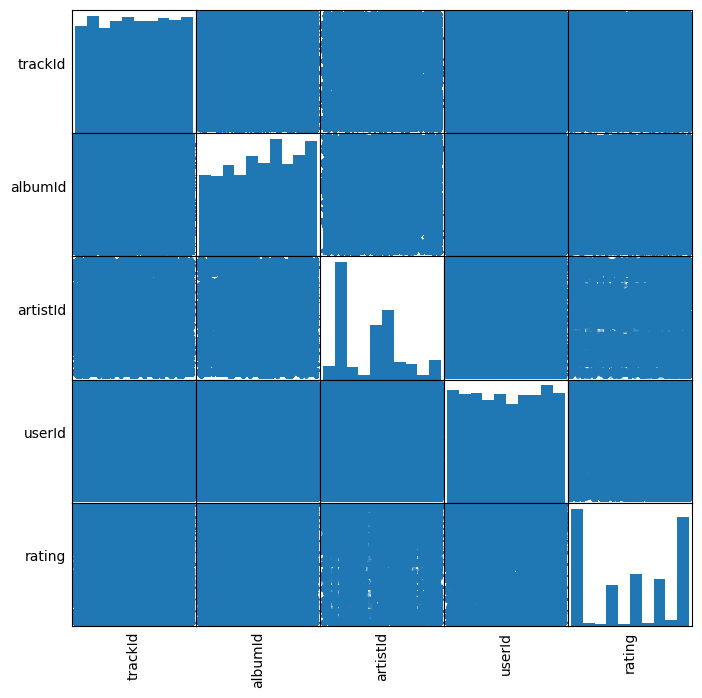

In [3]:
from pandas.plotting import scatter_matrix

numeric_data = df.select(numeric_features).toPandas()
axs = scatter_matrix(numeric_data, figsize=(8, 8))

n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())
